In [1]:
!pip install citipy

In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import numpy as np
import random
import sys
import math
from citipy import citipy

In [11]:
latitude = []
longitude = []

for lat in np.random.randint(-90, 90, 1500):
    latitude.append(lat)
    for lon in np.random.randint(-180, 180, 1500):
        longitude.append(lon)
        
coordinates = tuple(zip(latitude, longitude))

cities = []
country = []

for lat, lon in coordinates:
    city = citipy.nearest_city(lat, lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)
    
print('Thescript made {} different cities using random.'.format(len(set(cities))))


# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"

# query_url = url + "appid=" + api_key + "&q=" + city_name + Country_id

# # set up lists to hold reponse info
# lat = []
# lon = []
# temp = []
# cities = []

# # Loop through the list of cities and perform a request for data on each
# for city in city:
#     response = requests.get(query_url + city).json()
#     lat.append(response['coord']['lat'])
#     lon.append(response['coord']['lon'])
#     temp.append(response['main']['temp'])
#     city.append(response['main']['name'])
    

# #print(f"The latitude information received is: {lat}")
# #print(f"The temperature information received is: {temp}")
# #Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")


Thescript made 598 different cities using random.


In [15]:
Weather_df = pd.DataFrame({'Cities': cities, 'Country': country})

Weather_df['Latitude'] = ''
Weather_df['Longitude'] = ''
Weather_df['Temperature'] = ''
Weather_df['Humidity'] = ''
Weather_df['Cloudiness (%)'] = ''
Weather_df['Wind Speed (mph)'] = ''

Weather_df = Weather_df.drop_duplicates(subset=['Cities'], keep='first')



for index, row in Weather_df.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    
    country_info = requests.get(api_url).json()
    
    #print all api url's for each city
    print(api_url)
    
    
    try:
        Weather_df.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        Weather_df.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        Weather_df.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        Weather_df.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        Weather_df.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        Weather_df.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        Weather_df.set_value(index,'Latitude',np.nan)
        Weather_df.set_value(index,'Longitude',np.nan)
        Weather_df.set_value(index,'Temperature (F)',np.nan)
        Weather_df.set_value(index,'Humidity (%)',np.nan)
        Weather_df.set_value(index,'Cloudiness (%)',np.nan)
        Weather_df.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

    
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     units = "imperial"

#     query_url = url + "appid=" + api_key + "&q=" + city_name + Country_id
    
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()


# print(url)


http://api.openweathermap.org/data/2.5/forecast?q=gordeyevka,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523


/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use

http://api.openweathermap.org/data/2.5/forecast?q=santa eulalia del rio,es&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip


/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/unit202301/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use

http://api.openweathermap.org/data/2.5/forecast?q=pouso alegre,br&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=armacao dos buzios,br&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=butaritari,ki&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=acapulco,mx&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=tabas,ir&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=college,us&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=attawapiskat,ca&units

http://api.openweathermap.org/data/2.5/forecast?q=hamilton,bm&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=raudeberg,no&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=dryden,ca&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=yerbogachen,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=alofi,nu&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=tucuman,ar&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=saint george,bm&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=san andres,co&units=IMPERIAL&mo

http://api.openweathermap.org/data/2.5/forecast?q=korla,cn&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=dafeng,cn&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=dujuma,so&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=sao filipe,cv&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=brigantine,us&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=polyarnyy,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=craig,us&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=tabiauea,ki&units=IMPERIAL&mode=json&A

http://api.openweathermap.org/data/2.5/forecast?q=dingli,mt&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=nikolskoye,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=zhezkazgan,kz&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=qandala,so&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=keti bandar,pk&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=yulara,au&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=kasongo-lunda,cd&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=half moon bay,us&units=IMPERIAL&mode=json&APPID=a259977545fa7

http://api.openweathermap.org/data/2.5/forecast?q=vestmannaeyjar,is&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=viligili,mv&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=vao,nc&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=sorvag,fo&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=saint-pierre,pm&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=kahului,us&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=olavarria,ar&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/foreca

http://api.openweathermap.org/data/2.5/forecast?q=salamiyah,sy&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=sibolga,id&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=jingdezhen,cn&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=east london,za&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=bourail,nc&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=cabo san lucas,mx&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=severobaykalsk,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=karkaralinsk,kz&units=IMPERIAL&mode=json&APPID=a2599

http://api.openweathermap.org/data/2.5/forecast?q=kigali,rw&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=vanimo,pg&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=urumqi,cn&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=chiredzi,zw&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=isangel,vu&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=turukhansk,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=candawaga,ph&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=sh

http://api.openweathermap.org/data/2.5/forecast?q=pecos,us&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=laguna,br&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=krasnoborsk,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=aklavik,ca&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=yarega,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=taldan,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=samusu,ws&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=bonavis

http://api.openweathermap.org/data/2.5/forecast?q=kavaratti,in&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=hertford,gb&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=rach gia,vn&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=cardston,ca&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=muslyumovo,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=morehead,pg&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=jiwani,pk&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=kloulklubed,pw&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c

http://api.openweathermap.org/data/2.5/forecast?q=washington,us&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=bjelovar,hr&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=manzhouli,cn&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=louisbourg,ca&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=novopokrovka,ru&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=tirat karmel,il&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=tanout,ne&units=IMPERIAL&mode=json&APPID=a259977545fa7bcb93c7c0f252cf1523
http://api.openweathermap.org/data/2.5/forecast?q=suhbaatar,mn&units=IMP

In [16]:
Weather_df['Latitude'] = pd.to_numeric(Weather_df['Latitude'])
Weather_df['Longitude'] = pd.to_numeric(Weather_df['Longitude'])
Weather_df['Temperature (F)'] = pd.to_numeric(Weather_df['Temperature (F)'])
Weather_df['Humidity (%)'] = pd.to_numeric(Weather_df['Humidity (%)'])
Weather_df['Cloudiness (%)'] = pd.to_numeric(Weather_df['Cloudiness (%)'])
Weather_df['Wind Speed (mph)'] = pd.to_numeric(Weather_df['Wind Speed (mph)'])['Latitude'] = pd.to_numeric(Weather_df['Latitude'])

Weather_df.head()


,Cities,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness (%),Wind Speed (mph),Temperature (F),Humidity (%)
0,gordeyevka,ru,52.9584,31.9735,,,44.0,52.9584,59.38,91.0
1,santa eulalia del rio,es,NaN,NaN,,,NaN,NaN,NaN,NaN
2,taolanaro,mg,NaN,NaN,,,NaN,NaN,NaN,NaN
3,pouso alegre,br,-22.2344,-45.9328,,,0.0,-22.2344,51.91,81.0
4,armacao dos buzios,br,NaN,NaN,,,NaN,NaN,NaN,NaN


In [25]:
original_df = len(Weather_df)
post_drop = len(Weather_df.dropna())

missing_data = original_df - post_drop

print('These cities {} did not have weather\
 information and are dropped dataframe.'.format(missing_data))

print('\n')

print("This dataframe used for plotting contains weather information for {} different cities. "\
      .format(len(Weather_df.dropna())))

Weather_df = Weather_df.dropna()
Weather_df.to_csv(path_or_buf='Weather_df.csv')

These cities 0 did not have weather information and are dropped dataframe.


This dataframe used for plotting contains weather information for 530 different cities. 


<function matplotlib.pyplot.show>

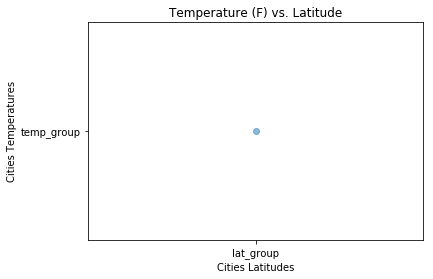

In [72]:
#Weather_df = Weather_df.drop(columns=["Temperature", "Humidity"])
lat_group = Weather_df.groupby('Cities')['Latitude']
temp_group = Weather_df.groupby('Cities')['Temperature (F)']
hum_group = Weather_df.groupby('Cities')['Humidity (%)']
wind_group = Weather_df.groupby('Cities')['Wind Speed (mph)']
cloud_group = Weather_df.groupby('Cities')['Cloudiness (%)']


# # doubling the width of markers# doubli 
# #plt.scatter(lat_group, temp_group, marker="o", facecolors="red", edgecolors="black",
#             s=lat_group, alpha=0.75)
# N = 20
# area = (30 * np.random.rand(N))**2
#colors = cm.rainbow(np.random.rand(N))
x = 'lat_group'
y = 'temp_group'

plt.scatter(x,y,alpha=0.5)

plt.xlabel('Cities Latitudes')
plt.ylabel('Cities Temperatures')
plt.title('Temperature (F) vs. Latitude')

plt.show

In [29]:
plot_df.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")

NameError: name 'plot_df' is not defined

In [ ]:
def encrypt_key(input_url):
    return input_url[0:53]+"<YourKey>"+input_url[85:]

for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))

In [ ]:
# Drop cities with missing information
selected_cities = selected_cities.dropna()

selected_cities.shape
selected_cities.to_csv("City_Weather_data.csv")